### Student Information
Name: Miguel Avila

Student ID: 611421408

GitHub ID: MigzAvila

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Import all libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
# helper functions
import helpers.data_mining_helpers as dmh
 

## Import Data (Reddit data) - Data source - Data Preparation

In [2]:
### Begin Assignment Here
redditData = pd.read_csv('newdataset/Reddit-stock-sentiment.csv', encoding='utf-8') # import data from newdataset
print(redditData.shape) 
redditData[:5] # validate that data was imported correctly 

(847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


### Data observation (Exploration)

In [3]:
columns = redditData.keys()
redditData.query("label == -1")

redditData.head(10)[["type","post_id","subreddit","title","url","upvotes","text","entities"]]
redditData.tail(10)[["type","post_id","subreddit","title","url","upvotes","text","entities"]]

redditData.loc[-10:, 'title']

0        Retardation is on the menu boys! WSB is so back
1      Retail giant TARGET has now declined for 10 co...
2      How do you feel about a sitting president maki...
3                                  Who knows more? $VMAR
4      The Trump administration is begging Xi Jinping...
                             ...                        
842    $MRIN Marin Software killed it today. Hope som...
843                       $ U.S. dollar value (crashing)
844                              Analyst Recommendations
845    Weekend Discussion Thread for the Weekend of A...
846                     Someone post the hotline please.
Name: title, Length: 847, dtype: object

### Some analysis with quering

In [4]:
# check if there any relationship with the post and comments
redditData.query("post_id == 'mmnu7v9'")[["subreddit","title","url","upvotes","text","entities"]]

# check if there any duplicates, that may indicate that there might be a relationship or duplicates
redditData.query("subreddit == 'StockMarket'")[["type","post_id","subreddit","title","url","upvotes","text","entities"]].duplicated()


2      False
4      False
18     False
26     False
32     False
       ...  
828    False
839    False
840    False
841    False
843    False
Length: 250, dtype: bool

In [5]:
# redditData.apply(lambda x: dmh.check_missing_values(x))
redditData.isnull().apply(lambda x: dmh.check_missing_values(x))
# As we can see, we are missing a lot of data when it comes to the upvotes and downvotes
# A possible solution is to drop these values

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


### Cleaning the data for better analysis (Data Preparation)

In [6]:
redditData.apply(lambda x: dmh.check_missing_values(x), axis=1)
redditData.dropna(axis=1, inplace=True)
len(redditData)
redditData['subreddit'] = redditData['subreddit'].str.lower()
redditData.shape

(847, 14)

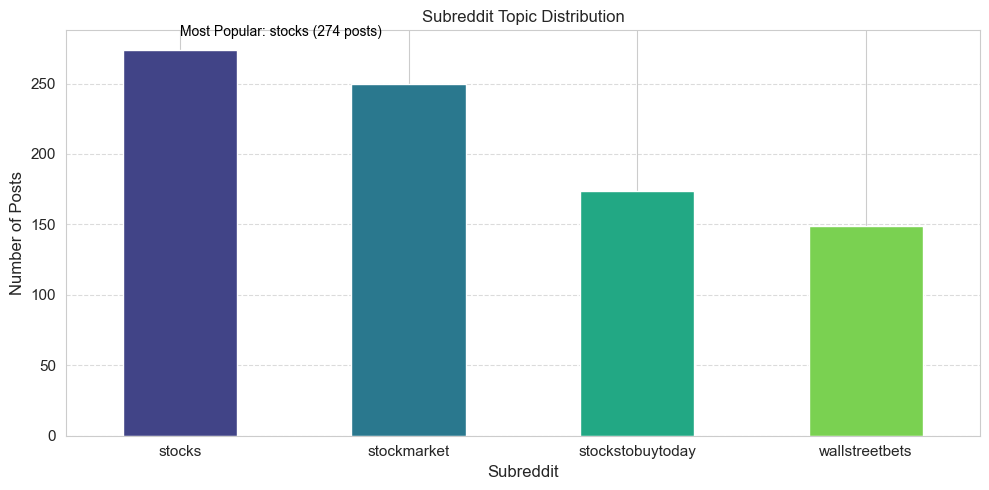

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up a more vivid color for our charts
sns.set_style("whitegrid")
sns.set_palette("viridis") 

# Plot the value counts
ax = redditData['subreddit'].value_counts().plot(
    kind='bar',
    title='Subreddit Topic Distribution',
    rot=0,
    fontsize=11,
    figsize=(10, 5),  # Wider and taller for better readability
    color=sns.color_palette("viridis", n_colors=len(redditData['subreddit'].value_counts()))
)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve labels
ax.set_xlabel('Subreddit', fontsize=12)
ax.set_ylabel('Number of Posts', fontsize=12)

# add note to the highest subreddit 
max_subreddit = redditData['subreddit'].value_counts().idxmax()
max_count = redditData['subreddit'].value_counts().max()
ax.annotate(
    f"Most Popular: {max_subreddit} ({max_count} posts)",
    xy=(0, max_count),  # Use numeric x position
    xytext=(0, 10),      # Offset text above the bar
    textcoords='offset points',
    fontsize=10,
    color='black'
)


# Adjust layout
plt.tight_layout()
plt.show()


### Sampling the data and comparing it to our main data

In [8]:
reddit_sample = redditData.sample(n=500) 
reddit_sample.shape

(500, 14)

<Axes: title={'center': 'Subreddit Distribution Comparision With Sample Data'}>

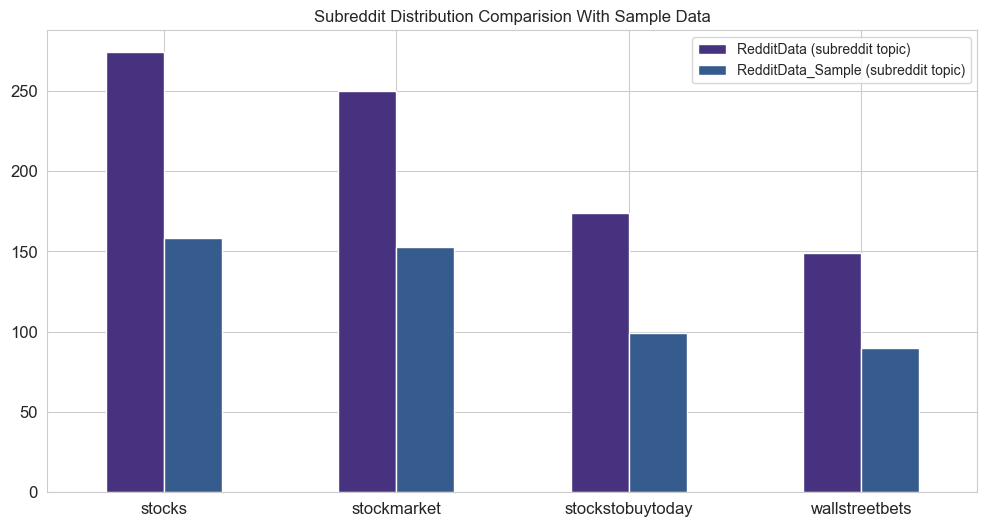

In [9]:
# Answer here .category_name.value_counts()
#Combine both data into a single dataframe for plotting
summaryCounts = pd.DataFrame({
    "RedditData (subreddit topic)": redditData.subreddit.value_counts(),
    "RedditData_Sample (subreddit topic)": reddit_sample.subreddit.value_counts()
})

# plot the dataframe
summaryCounts.plot(kind = 'bar',
                    title = 'Subreddit Distribution Comparision With Sample Data', 
                       xlabel="",
                       rot = 0, fontsize = 12, figsize = (12,6))

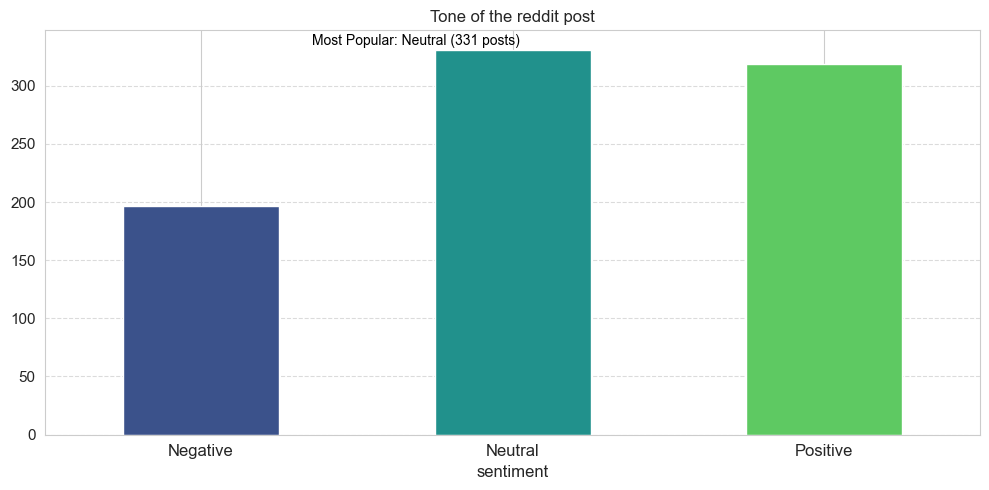

In [10]:
#Checking out other data
# Providing values to the x axis
sentiment_labels = {
    -1: "Negative",
     0: "Neutral",
     1: "Positive"
}
# Getting summary count of the values (-1, 0, 1)
summaryCounts = redditData['sentiment'].value_counts()
# reorder the columns
order = [-1, 0, 1] 
summaryCounts = summaryCounts.reindex(order)


# Plot the value counts
ax = summaryCounts.plot(
    kind='bar',
    title='Tone of the reddit post',
    rot=0,
    fontsize=11,
    figsize=(10, 5),  # Wider and taller for better readability
    color=sns.color_palette("viridis", n_colors=len(redditData['label'].value_counts()))
)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve labels
ax.set_xlabel('sentiment', fontsize=12)

# Apply custom x-tick labels
ax.set_xticks(range(len(summaryCounts.index)))
ax.set_xticklabels([sentiment_labels[val] for val in summaryCounts.index], fontsize=12)

# add note to the highest subreddit 
max_subreddit = summaryCounts.idxmax()
max_count = summaryCounts.max()
ax.annotate(
    f"Most Popular: {sentiment_labels[max_subreddit]} ({max_count} posts)",
    xy=(0, max_count),  # Use numeric x position
    xytext=(80, 3),      # Offset text above the bar
    textcoords='offset points',
    fontsize=10,
    color='black'
)


# Adjust layout
plt.tight_layout()
plt.show()


In [11]:
# Print some sample posts for each sentiment category
for sentiment_value, label in sentiment_labels.items():
    print(f"\n--- {label} samples ---")
    # Filter the dataframe for the current sentiment
    subset = redditData[redditData['sentiment'] == sentiment_value]
    # Take up to 3 random samples (or fewer if there aren't enough)
    samples = subset['text'].sample(min(3, len(subset)), random_state=42)
    for i, text in enumerate(samples, 1):
        print(f"{i}. {text}\n")



--- Negative samples ---
1. Years ago I found Kate Rooney’s instagram.

Private, but I requested anyway.

When she got married she went public and it auto approved all of the pending follow requests. 

I was in. I couldn’t believe it. My CNBC crush. She was so hot.

Just noticed today that she removed me. While sad, the fact that she had to see my profile and click remove means she knows I exist. Small Ws

2. Look up "Dark Gothic MAGA how Tech billionaires plan to destroy America" on YouTube. Personal enrichment is just a stepping stone. The end goal is dissolution of the US, to be replaced by libertarian Blockchain nonsense.

3. His plan is "fuck you, be less poor"


--- Neutral samples ---
1. Oh my gourd!

2. I currently own 

* TSLA
* FB
* BABA
* BP
* AUY

I hoep this helps.  I plan to take more profits 11/5 at the 1242.00 price range

3. China will fold and Trump will get the W he wants.


--- Positive samples ---
1. Well, they wanted to devalue USD, so now they got it... 

But ge

In [12]:
# Print some sample posts for each labels category
for sentiment_value, label in sentiment_labels.items():
    print(f"\n--- {label} samples ---")
    # Filter the dataframe for the current sentiment
    subset = redditData[redditData['label'] == sentiment_value]
    # Take up to 3 random samples (or fewer if there aren't enough)
    samples = subset['text'].sample(min(3, len(subset)), random_state=42)
    for i, text in enumerate(samples, 1):
        print(f"{i}. {text}\n")



--- Negative samples ---
1. China has been preparing for this and this administration lies, is terrible at negotiating, and cannot be trusted with an so-called *deals.*

This administration is barely treading water and is likely to bring the United Sates into a deep recession whilst simultaneously claiming victory and blaming previous administrations along the meat. The U.S. willingly chose this.

2. Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.

3. It was so blatant.  In a normal version of the US, this is exactly what the SEC would be prosecuting.   But thanks to SCOTUS making the Presidency a flawless monarchy unable to commit crime, nothing will happen.


--- Neutral samples ---
1. What are we gonna call it when Wendy's is gone.

2. All proceeds from elected officials and those appointed performing official acts should go to the public treasury.

3. Updated Daily by EOD

  
[Daily Shorts]()


--- Positive samples ---
1. Nah he's p

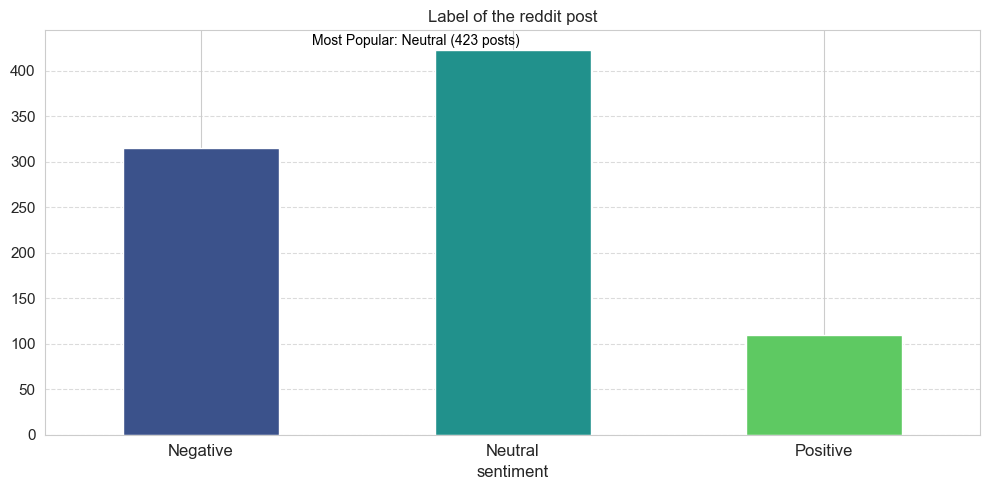

In [13]:
#Checking out other data
# Providing values to the x axis
sentiment_labels = {
    -1: "Negative",
     0: "Neutral",
     1: "Positive"
}
# Getting summary count of the values (-1, 0, 1)
summaryCounts = redditData['label'].value_counts()
# reorder the columns
order = [-1, 0, 1] 
summaryCounts = summaryCounts.reindex(order)


# Plot the value counts
ax = summaryCounts.plot(
    kind='bar',
    title='Label of the reddit post',
    rot=0,
    fontsize=11,
    figsize=(10, 5),  # Wider and taller for better readability
    color=sns.color_palette("viridis", n_colors=len(redditData['label'].value_counts()))
)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve labels
ax.set_xlabel('sentiment', fontsize=12)

# Apply custom x-tick labels
ax.set_xticks(range(len(summaryCounts.index)))
ax.set_xticklabels([sentiment_labels[val] for val in summaryCounts.index], fontsize=12)

# add note to the highest subreddit 
max_subreddit = summaryCounts.idxmax()
max_count = summaryCounts.max()
ax.annotate(
    f"Most Popular: {sentiment_labels[max_subreddit]} ({max_count} posts)",
    xy=(0, max_count),  # Use numeric x position
    xytext=(80, 3),      # Offset text above the bar
    textcoords='offset points',
    fontsize=10,
    color='black'
)


# Adjust layout
plt.tight_layout()
plt.show()


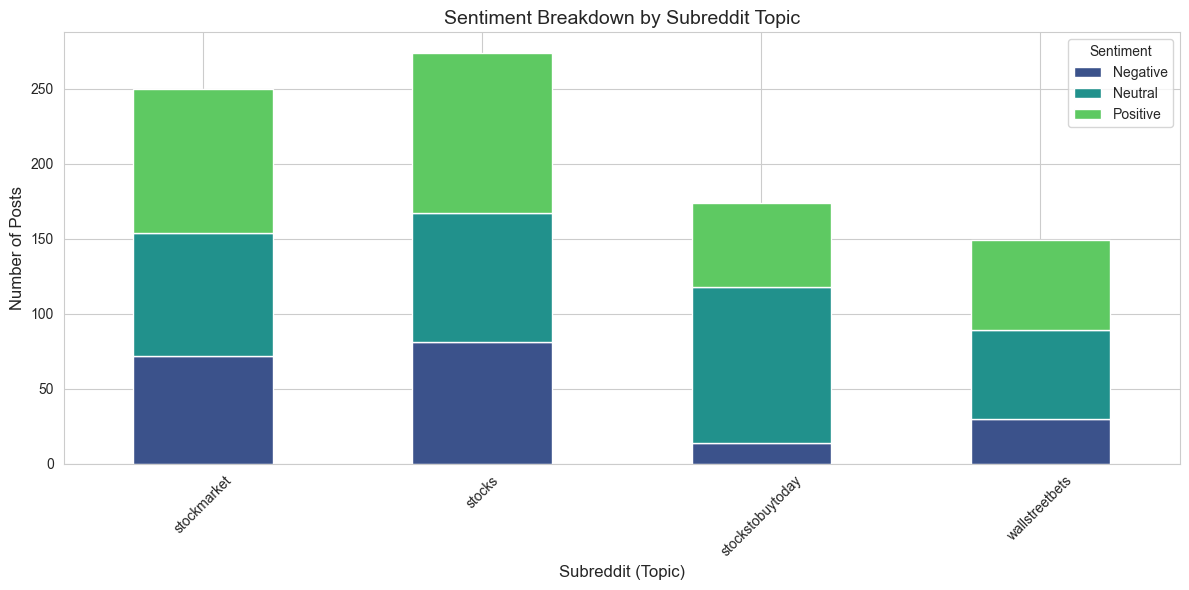

In [14]:
# Group subreddit by sentiment
subreddit_sentiment = redditData.groupby(["subreddit", "sentiment"]).size().unstack(fill_value=0)

# Reorder columns by sentiment order
subreddit_sentiment = subreddit_sentiment[order]  # order = [-1, 0, 1]

# Plot stacked bar chart
ax = subreddit_sentiment.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=sns.color_palette("viridis", n_colors=3),
    rot=45
)

# Labels & title
ax.set_xlabel("Subreddit (Topic)", fontsize=12)
ax.set_ylabel("Number of Posts", fontsize=12)
ax.set_title("Sentiment Breakdown by Subreddit Topic", fontsize=14)

# Replace legend values with readable labels
ax.legend([sentiment_labels[val] for val in order], title="Sentiment")

plt.tight_layout()
plt.show()


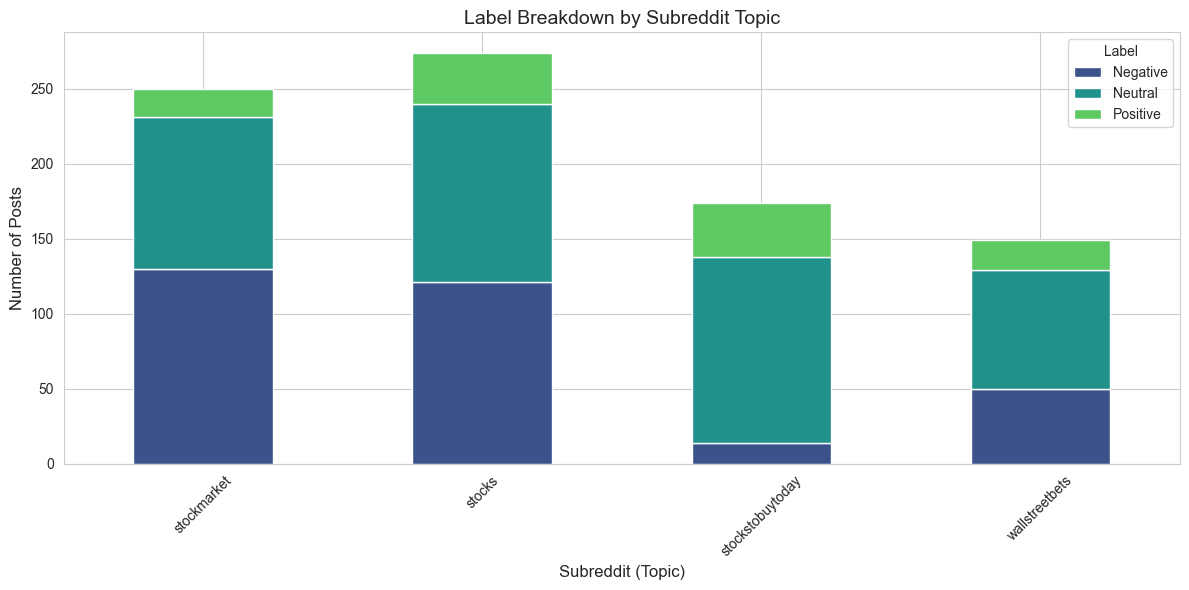

In [15]:
# Group subreddit by label
subreddit_sentiment = redditData.groupby(["subreddit", "label"]).size().unstack(fill_value=0)

# Reorder columns by sentiment order
subreddit_sentiment = subreddit_sentiment[order]  # order = [-1, 0, 1]

# Plot stacked bar chart
ax = subreddit_sentiment.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=sns.color_palette("viridis", n_colors=3),
    rot=45
)

# Labels & title
ax.set_xlabel("Subreddit (Topic)", fontsize=12)
ax.set_ylabel("Number of Posts", fontsize=12)
ax.set_title("Label Breakdown by Subreddit Topic", fontsize=14)

# Replace legend values with readable labels
ax.legend([sentiment_labels[val] for val in order], title="Label")

plt.tight_layout()
plt.show()

## So the negative (-1) values got my interest and I like to explore this area more, see what trending words, and mostly used words are. 

Number of negative posts: 197


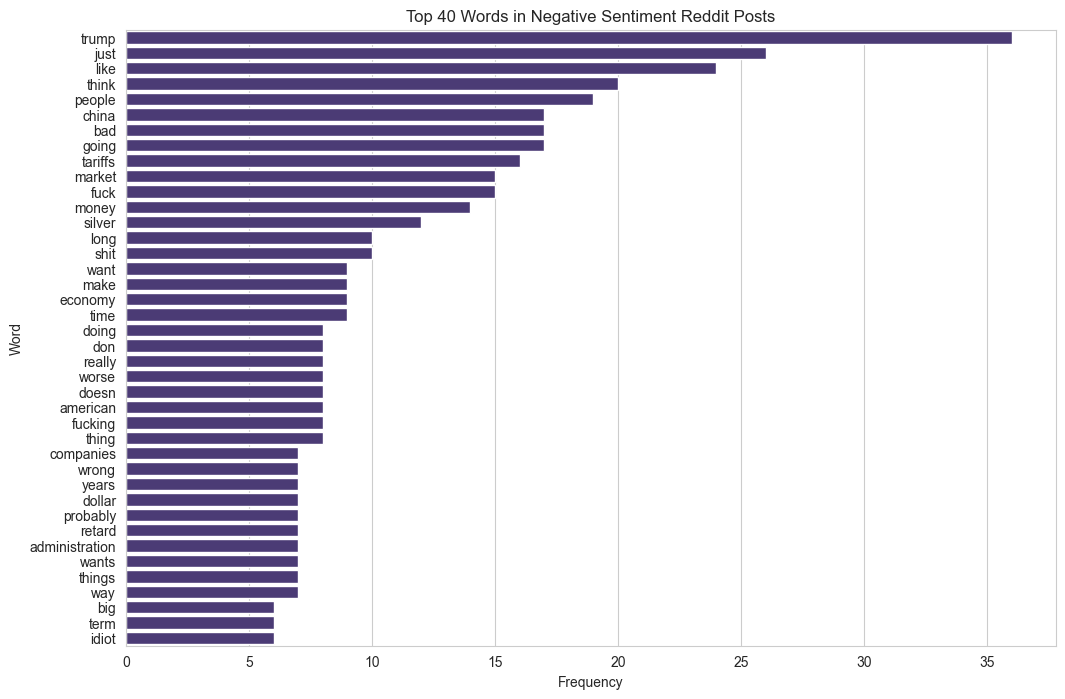

In [16]:
# Filter only negative sentiment posts
stocksNegativePost = redditData.query("sentiment == -1")
print("Number of negative posts:", len(stocksNegativePost))

# Vectorize the text (all negative posts)
count_vect = CountVectorizer(stop_words="english")
stocksNegativePost_counts = count_vect.fit_transform(stocksNegativePost["text"])

# Get total word frequencies
word_freq = np.asarray(stocksNegativePost_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()

# Build DataFrame
freq_df = pd.DataFrame({"term": terms, "frequency": word_freq})

# Get top 40
top40 = freq_df.sort_values(by="frequency", ascending=False).head(40)

# --- Plot ---
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top40,
    x="frequency",
    y="term",
    hue=None 
)
plt.title("Top 40 Words in Negative Sentiment Reddit Posts")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()



Number of negative posts: 315


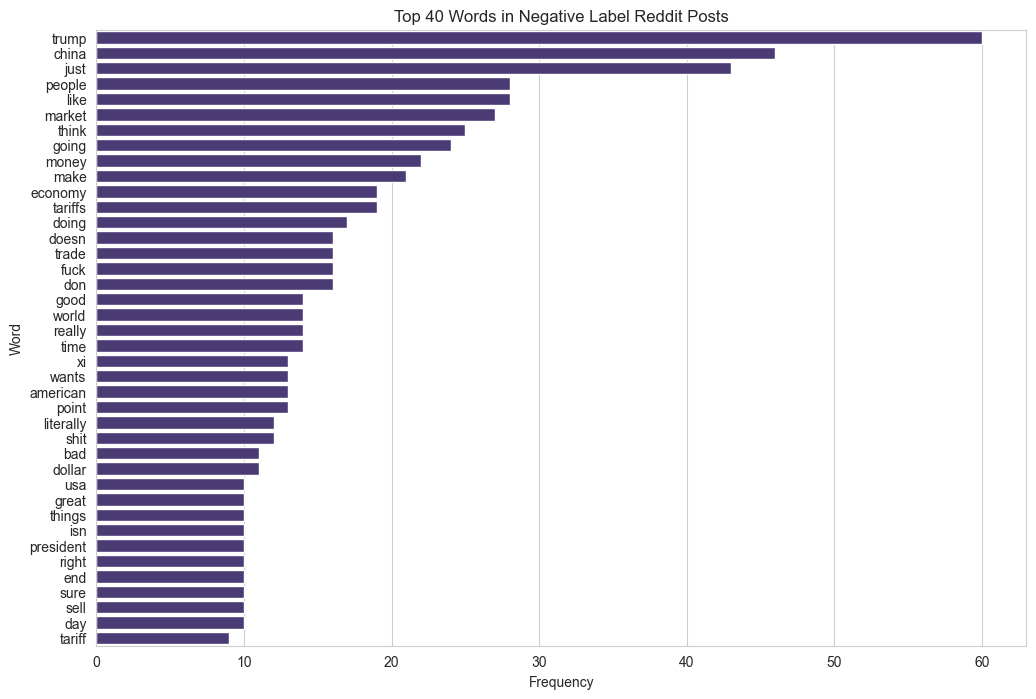

In [17]:
# Filter only negative sentiment posts
stocksNegativePost = redditData.query("label == -1")
print("Number of negative posts:", len(stocksNegativePost))

# Vectorize the text (all negative posts)
count_vect = CountVectorizer(stop_words="english")
stocksNegativePost_counts = count_vect.fit_transform(stocksNegativePost["text"])

# Get total word frequencies
word_freq = np.asarray(stocksNegativePost_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()

# Build DataFrame
freq_df = pd.DataFrame({"term": terms, "frequency": word_freq})

# Get top 40
top40 = freq_df.sort_values(by="frequency", ascending=False).head(40)

# --- Plot ---
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top40,
    x="frequency",
    y="term",
    hue=None  
)
plt.title("Top 40 Words in Negative Label Reddit Posts")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()



### Now that I see some correlation between the negative post from the label and the sentiment, we can create a graph to see the similarities and see the most used words

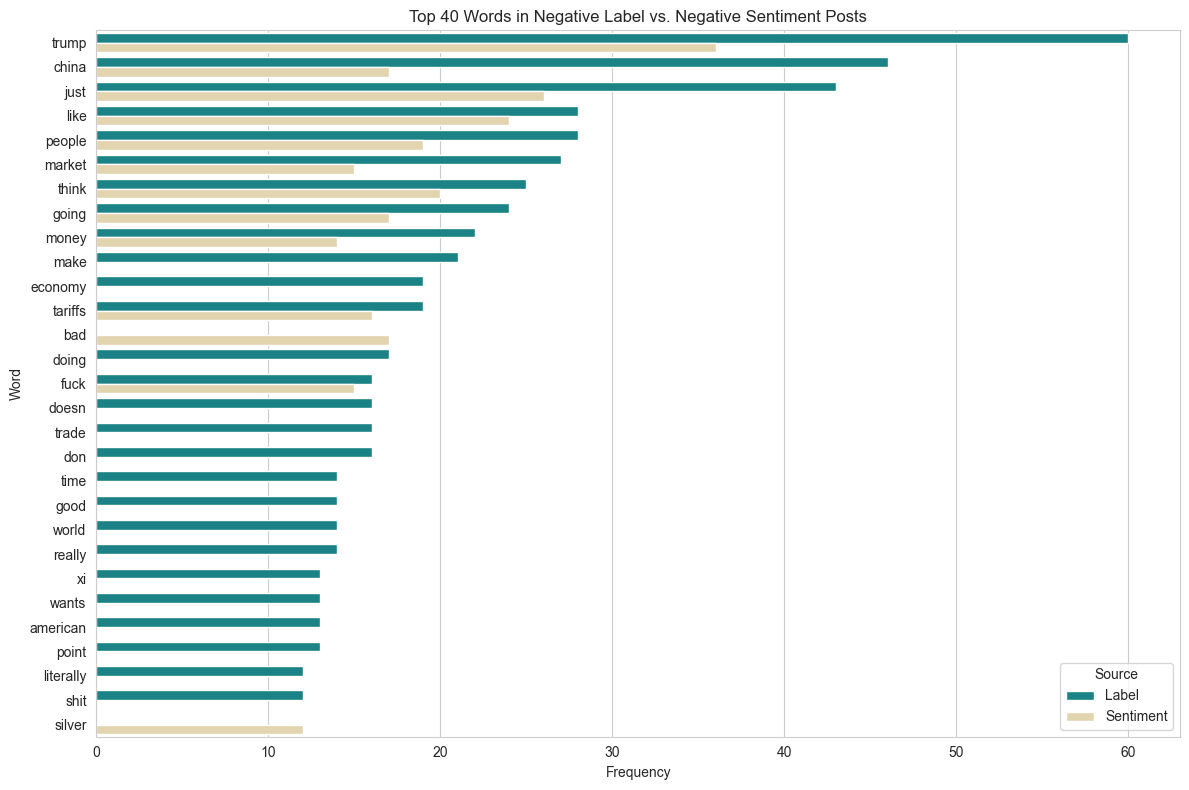

In [18]:
# Filter negative label posts
label_negative = redditData.query("label == -1")
label_freq = np.asarray(count_vect.fit_transform(label_negative["text"]).sum(axis=0)).flatten()
label_terms = count_vect.get_feature_names_out()
label_df = pd.DataFrame({
"term": label_terms,
"frequency": label_freq
})
label_top40 = label_df.sort_values(by="frequency", ascending=False).head(40)

# Filter negative sentiment posts
sentiment_negative = redditData.query("sentiment == -1")
sentiment_freq = np.asarray(count_vect.fit_transform(sentiment_negative["text"]).sum(axis=0)).flatten()
sentiment_terms = count_vect.get_feature_names_out()
sentiment_df = pd.DataFrame({
"term": sentiment_terms,
"frequency": sentiment_freq
})
sentiment_top40 = sentiment_df.sort_values(by="frequency", ascending=False).head(40)

# Combine both datasets
combined_df = pd.concat([
label_top40.assign(source="Label"),
sentiment_top40.assign(source="Sentiment")
]).sort_values(by="frequency", ascending=False).head(40)

# Plot grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
data=combined_df,
x="frequency",
y="term",
hue="source",
palette = ["#0a9396", "#e9d8a6"]  # Coral Red & Light Red


)
plt.title("Top 40 Words in Negative Label vs. Negative Sentiment Posts")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.legend(title="Source")
plt.tight_layout()
plt.show()


### Using the long tail method

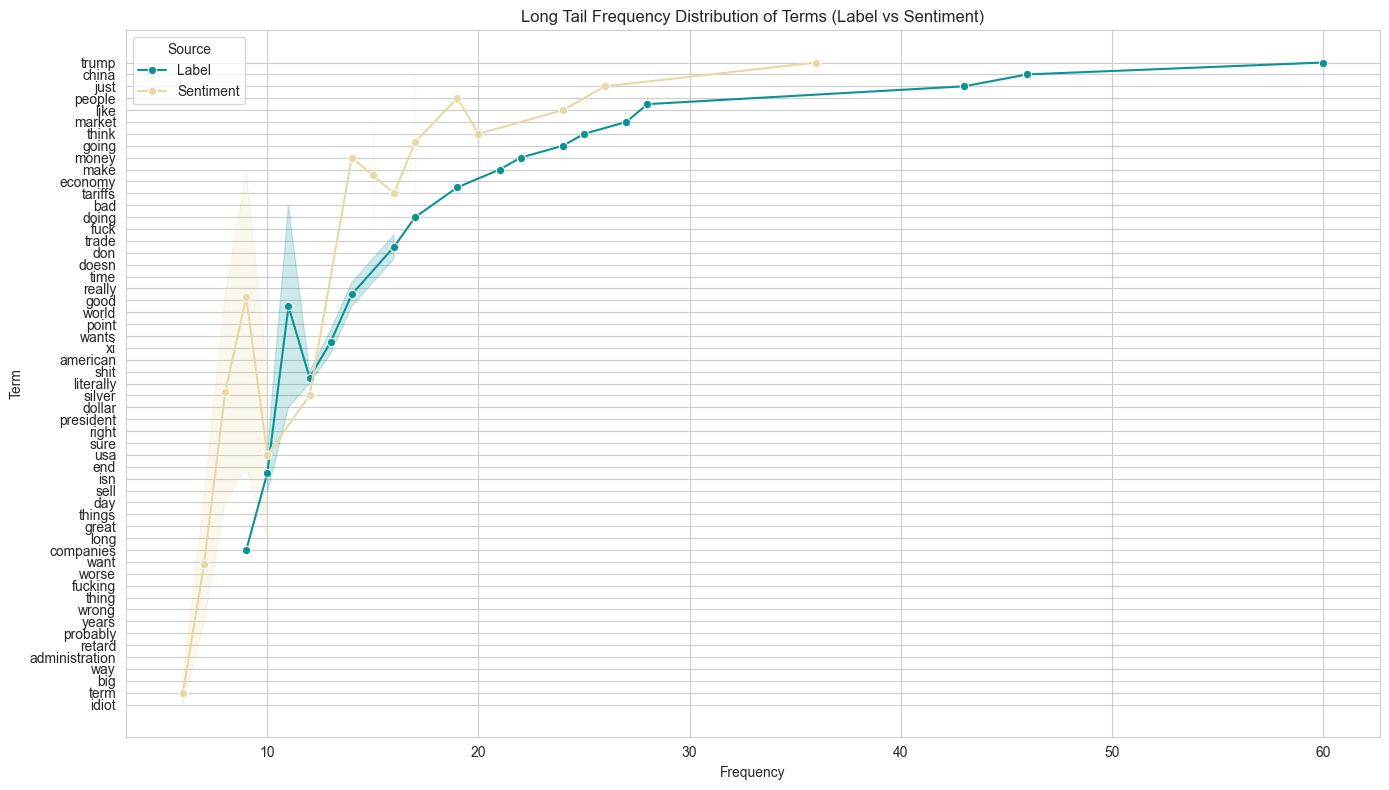

In [19]:

# Step 1: Process all terms from both datasets
label_freq = np.asarray(count_vect.transform(label_negative["text"]).sum(axis=0)).flatten()
label_terms = count_vect.get_feature_names_out()
label_df = pd.DataFrame({
    "term": label_terms,
    "frequency": label_freq
})
label_top40 = label_df.sort_values(by="frequency", ascending=False).head(40)

sentiment_freq = np.asarray(count_vect.transform(sentiment_negative["text"]).sum(axis=0)).flatten()
sentiment_terms = count_vect.get_feature_names_out()
sentiment_df = pd.DataFrame({
    "term": sentiment_terms,
    "frequency": sentiment_freq
})
sentiment_top40 = sentiment_df.sort_values(by="frequency", ascending=False).head(40)

# Step 2: Combine into one DataFrame with source info
combined_df = pd.concat([
    label_top40.assign(source="Label"),
    sentiment_top40.assign(source="Sentiment")
])

# Step 3: Sort by frequency (descending)
combined_df = combined_df.sort_values(by="frequency", ascending=False)

# Step 4: Plot as a long tail (line chart)
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=combined_df,
    x="frequency",  # Frequency on x-axis
    y="term",       # Term names on y-axis
    hue="source",   # Differentiate sources
    marker="o",
    palette=["#0a9396", "#e9d8a6"]
)

# Adjust layout for clarity
plt.title("Long Tail Frequency Distribution of Terms (Label vs Sentiment)")
plt.xlabel("Frequency")
plt.ylabel("Term")
plt.legend(title="Source")
plt.tight_layout()
plt.show()


### Using math log in our data

In [20]:
term_frequencies = np.asarray(stocksNegativePost_counts.sum(axis=0))[0]
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\migue\AppData\Local\Temp\ipykernel_80564\2166548998.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


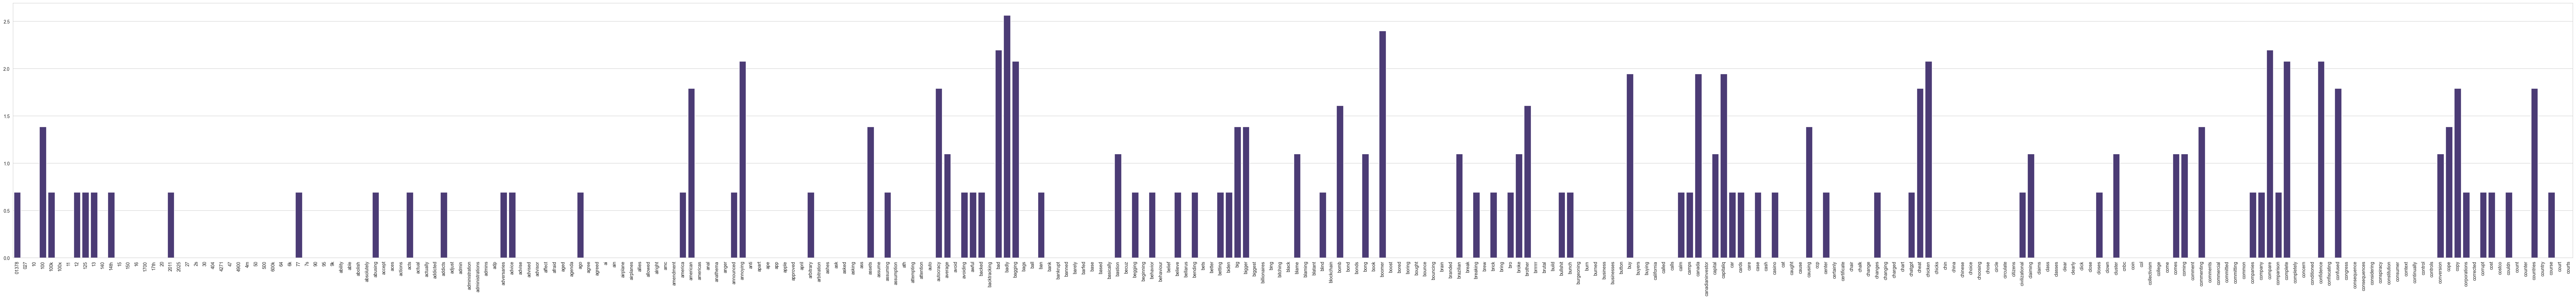

In [21]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

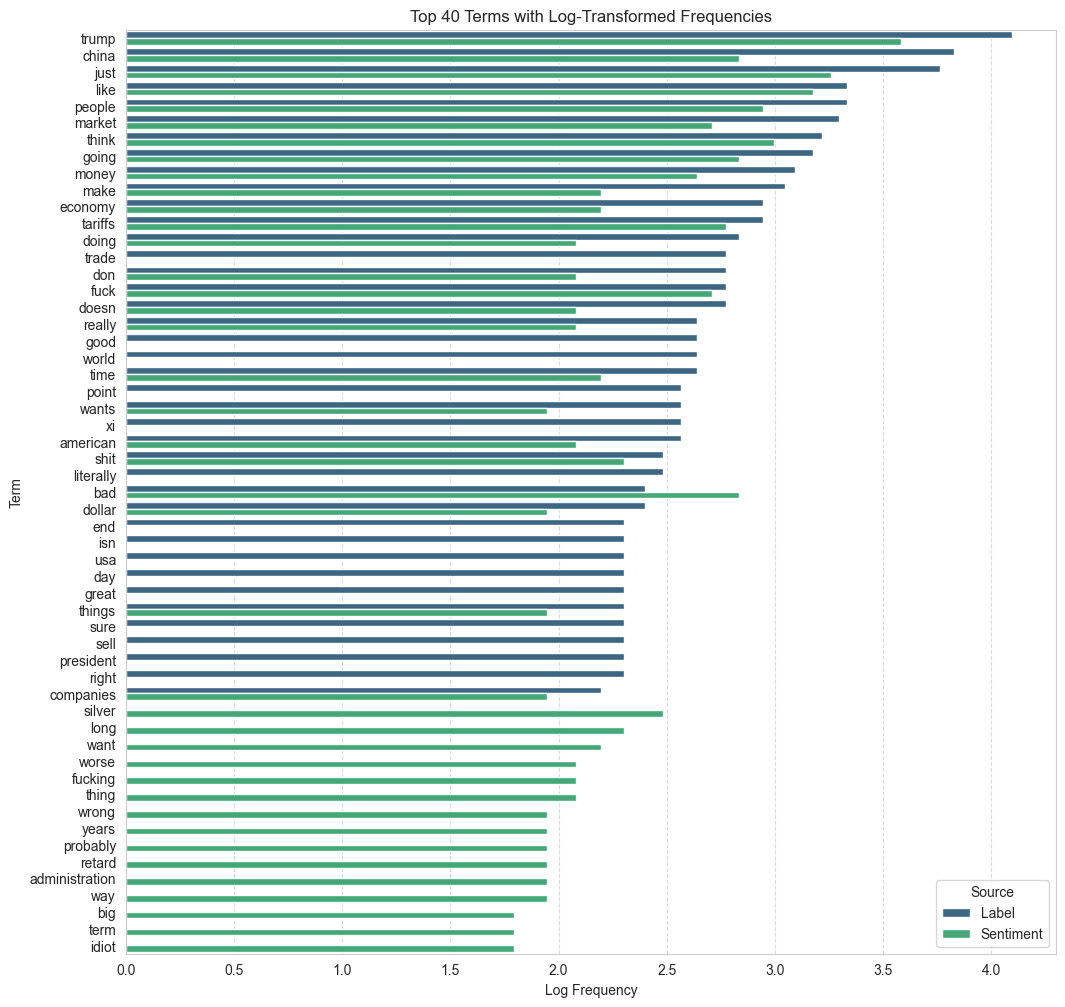

In [22]:
# Filter negative label posts
label_negative = redditData.query("label == -1")
label_freq = np.asarray(count_vect.transform(label_negative["text"]).sum(axis=0)).flatten()
label_terms = count_vect.get_feature_names_out()
label_df = pd.DataFrame({
    "term": label_terms,
    "frequency": label_freq
})
label_top40 = label_df.sort_values(by="frequency", ascending=False).head(40)

# Filter negative sentiment posts
sentiment_negative = redditData.query("sentiment == -1")
sentiment_freq = np.asarray(count_vect.transform(sentiment_negative["text"]).sum(axis=0)).flatten()
sentiment_terms = count_vect.get_feature_names_out()
sentiment_df = pd.DataFrame({
    "term": sentiment_terms,
    "frequency": sentiment_freq
})
sentiment_top40 = sentiment_df.sort_values(by="frequency", ascending=False).head(40)

# Combine both datasets
combined_df = pd.concat([
    label_top40.assign(source="Label"),
    sentiment_top40.assign(source="Sentiment")
])

# Apply logarithmic transformation to frequency
combined_df["frequency"] = [math.log(f) for f in combined_df["frequency"]]

# Plot the bar chart using log-transformed frequencies
plt.figure(figsize=(12, 12))
sns.barplot(x="frequency", y="term", hue="source", data=combined_df, palette="viridis")
plt.title("Top 40 Terms with Log-Transformed Frequencies")
plt.xlabel("Log Frequency")
plt.ylabel("Term")
plt.legend(title="Source")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


# Phase 2

In [23]:
### Begin Assignment Here

In [24]:
# add category column: 
label_map = {1.0: "positive", 0.0: "neutral", -1.0: "negative"}

# adding new category name by label
redditData['category_name_by_label'] = redditData['label'].map(label_map)

redditData



,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label,category_name_by_label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,negative
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,neutral
2,comment,2025-04-10 15:09:41,mmeevio,stockmarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,neutral
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,positive
4,comment,2025-04-11 14:48:05,mmkl6bw,stockmarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0,positive
843,comment,2025-04-11 5:01:24,mmijiuz,stockmarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,Where can I read this?,0.000000,0.000000,0.0,[],0.0,neutral
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0,neutral
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0,negative


In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = redditData['category_name_by_label'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = redditData[redditData['category_name_by_label'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()    
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

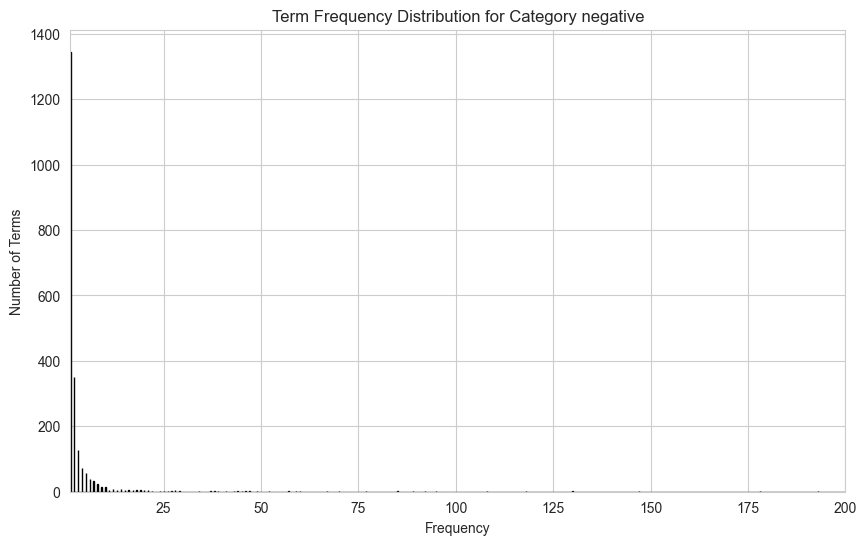

In [26]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

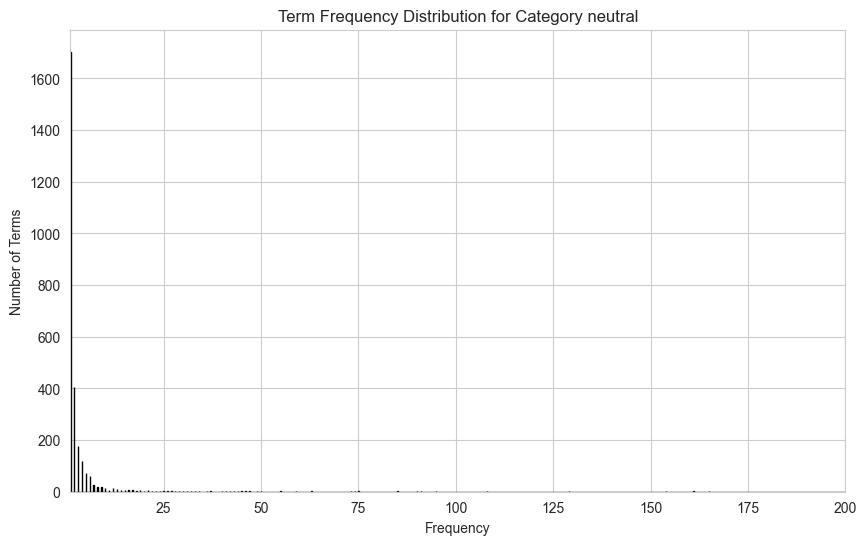

In [27]:
 # Sum over all documents to get total frequency for each word
category_number=1 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

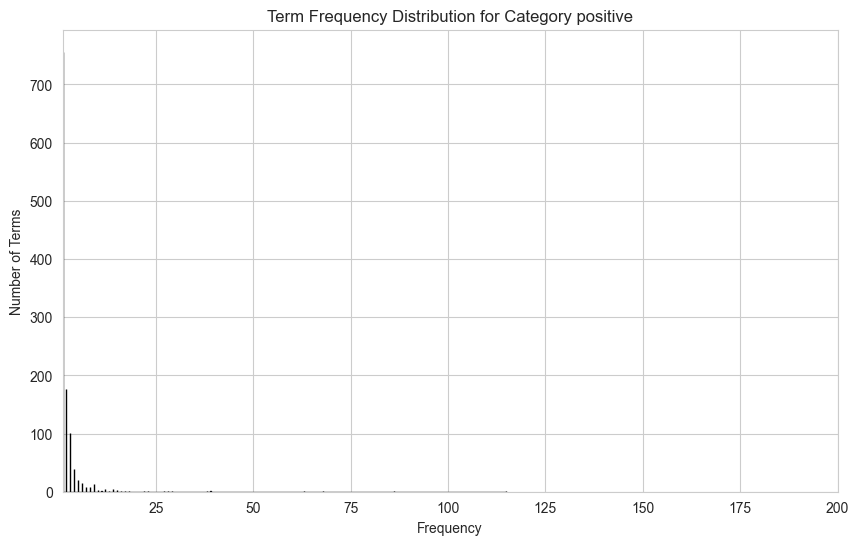

In [28]:
 # Sum over all documents to get total frequency for each word
category_number=2 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [29]:
category_number=0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]
# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: negative
Number of terms in top 5%: 109
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'he', 'will', 'for', 'you', 'be', 'are', 'trump', 'they', 'us', 'on', 'as', 'so', 'not', 'all', 'have', 'china', 'but', 'has', 'just', 'we', 'what', 'if', 'with', 'was', 'at', 'his', 'can', 'their', 'about', 'or', 'even', 'people', 'like', 'no', 'there', 'my', 'market', 'more', 'them', 'think', 'him', 'now', 'going', 'money', 'one', 're', 'make', 'how', 'would', 'an', 'do', 'out', 'than', 'down', 'other', 'from', 'economy', 'up', 'tariffs', 'by', 'then', 'when', 'get', 'doing', 'over', 'some', 'who', 'don', 'been', 'trade', 'doesn', 'fuck', 'see', 'still', 'only', 'why', 'really', 'time', 'any', 'our', 'because', 'world', 'good', 'back', 'american', 'point', 'go', 'wants', 'xi', 'never', 'shit', 'much', 'most', 'your', 'me', 'literally', 'could', 'everyone', 'dollar', 'these']


In [30]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: negative
Number of terms in bottom 1%: 21
Filtered terms: ['youtube', '500', 'program', '60', '65', '6k', '6th', '77', '7s', 'programs', 'projection', '98', '9k', '_are', 'aapl', '50', 'yourselves', '2k', '2s', '30', '3000']


In [31]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category negative we filter the following words:
Bottom 1.0% words: 
youtube       1
500           1
program       1
60            1
65            1
6k            1
6th           1
77            1
7s            1
programs      1
projection    1
98            1
9k            1
_are          1
aapl          1
50            1
yourselves    1
2k            1
2s            1
30            1
3000          1
dtype: int64
Top 5.0% words: 
these         11
dollar        11
everyone      12
could         12
literally     12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For category neutral we filter the following words:
Bottom 1.0% words: 
186         1
18630       1
1870        1
1k          1
1m          1
2028        1
yahoo       1
yall        1
yea         1
worked      1
2045        1
208         1
21          1
22rate      1
23          1
234         1
2012        1
2017        1
20211209    1
14      

,000,02,03,10,100,1000,10000,11,12,13,...,ya,yea,yeah,year,years,yet,yields,yippee,yo,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


In [33]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

Result for negative
Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.82857142857143
Maximum Transaction Size : 139
Standard Deviation Transaction Size : 13.325085884608757
Variance in Transaction Sizes : 178.1233848953594
Sparsity : 0.9942635444090342


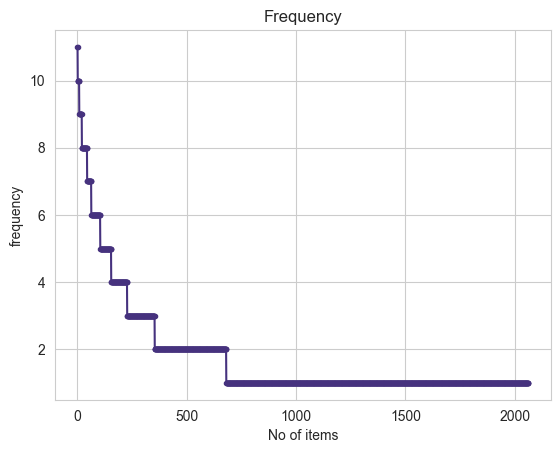

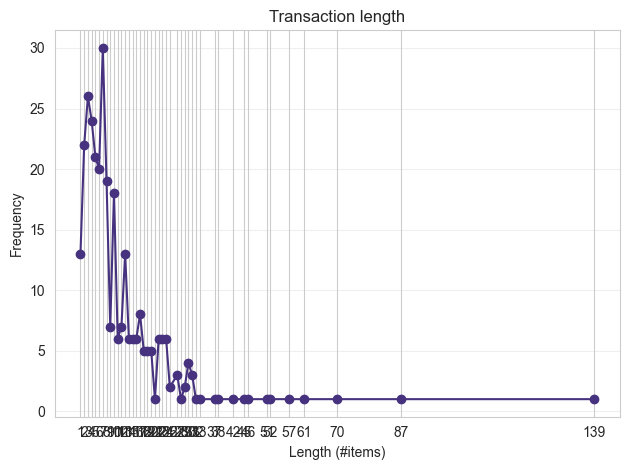

Result for neutral
Database size (total no of transactions) : 417
Number of items : 2586
Minimum Transaction Size : 1
Average Transaction Size : 10.764988009592326
Maximum Transaction Size : 201
Standard Deviation Transaction Size : 18.265492673393037
Variance in Transaction Sizes : 334.4302135214905
Sparsity : 0.99583720494602


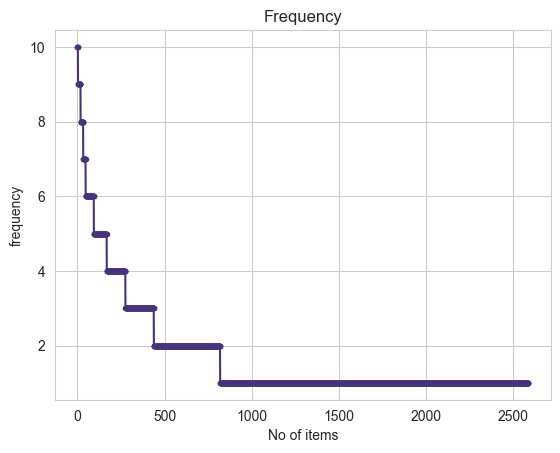

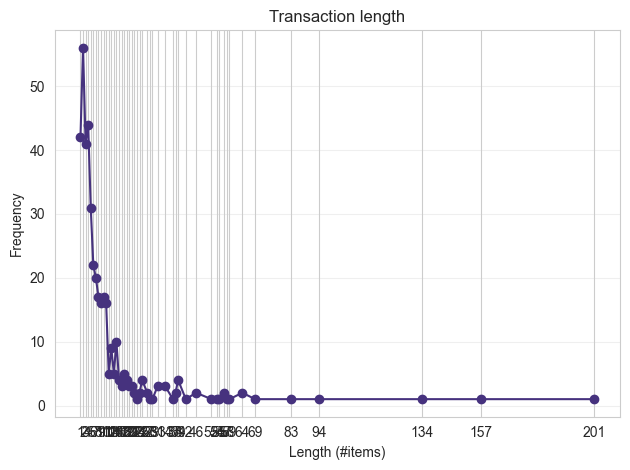

Result for positive
Database size (total no of transactions) : 108
Number of items : 1103
Minimum Transaction Size : 1
Average Transaction Size : 14.287037037037036
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.835286424609123
Variance in Transaction Sizes : 286.07571824160607
Sparsity : 0.9870471105738559


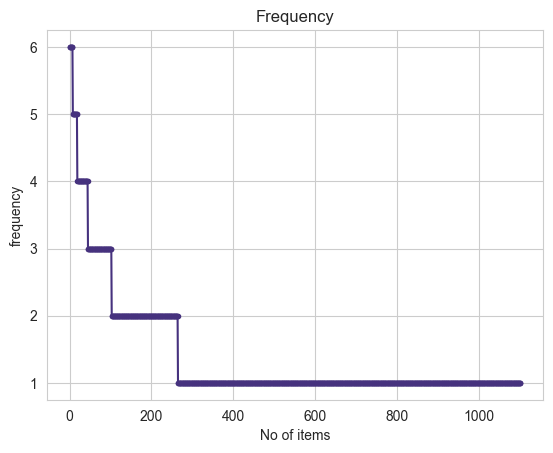

In [ ]:
# Looking at the statistics for all the categories
from PAMI.extras.dbStats import TransactionalDatabase as tds
for cat in categories: 
    print(f"Result for {cat}")
    obj = tds.TransactionalDatabase(f'td_freq_db_{cat}.csv')
    obj.run()
    obj.printStats()
    obj.plotGraphs()

After the checking the sparse values, we see that its above 98, so we are good to move forward with all three categories. 

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 2
dfs = []  # global list to hold all dataframes

for cat in categories:
    obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
    obj1.mine()
    frequentPatternsDF_negative = obj1.getPatternsAsDataFrame()

    print(f'Category: {cat}')
    print('Total No of patterns:', len(frequentPatternsDF_negative))
    print('Runtime:', obj1.getRuntime())

    obj1.save(f'freq_patterns_negative_{cat}_minSup2.txt')

    # Add the DataFrame to the global list
    dfs.append(frequentPatternsDF_negative)


In [ ]:
dfs

In [ ]:
import pandas as pd

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

In [ ]:
# no pattern discard

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(redditData['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
redditData['tokenized_text'] = redditData['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=redditData.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = redditData['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=redditData.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

In [ ]:
k=680
seperator='\t'
obj = alg.FAE(iFile='td_freq_db_negative.csv', k=k, sep=seperator)    #initialize
obj.mine()
frequentPatternsDF_negatvieFAE= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negatvieFAE))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

obj.save(f'freq_patterns_negative{k}.txt') #save the patterns
print(frequentPatternsDF_negatvieFAE)

In [ ]:
# using different min support count to check result - sweetspot is 2~3
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm
import pandas as pd

inputFile = 'td_freq_db_negative.csv'

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of MaxFPGrowth algorithm
for minSupCount in [2, 3, 6, 9]:
    obj = alg.MaxFPGrowth(inputFile, minSup=minSupCount)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
print(result)

In [ ]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = redditData['category_name_by_label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[redditData['category_name_by_label'] == category].T[0]
        ys = X_reduced[redditData['category_name_by_label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [ ]:
X_pca_tdm.shape

In [ ]:
X_tsne_tdm.shape

In [ ]:
X_umap_tdm.shape

In [ ]:
# Plotting 3d graphs to get different angel from 2d version
from mpl_toolkits.mplot3d import Axes3D

X_pca_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3d = TSNE(n_components=3, init='pca', learning_rate='auto').fit_transform(augmented_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Colors and categories
col = ['coral', 'blue', 'black', 'orange']
categories = redditData['category_name_by_label'].unique()

# Function to plot 3D scatter
def plot_3d(ax, X_reduced, title, elev=20, azim=45):
    for c, category in zip(col, categories):
        mask = redditData['category_name_by_label'] == category
        xs = X_reduced[mask, 0]
        ys = X_reduced[mask, 1]
        zs = X_reduced[mask, 2]
        ax.scatter(xs, ys, zs, c=c, label=category, alpha=0.7, s=40)
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.grid(True)

# Create figure with 3 subplots
fig = plt.figure(figsize=(30, 10))
angles = [(45, 45), (30, 25), (60, 30)]
methods = [('PCA', X_pca_3d), ('t-SNE', X_tsne_3d), ('UMAP', X_umap_3d)]

for i, ((title, data), (elev, azim)) in enumerate(zip(methods, angles), 1):
    ax = fig.add_subplot(1, 3, i, projection='3d')  # 3D subplot
    plot_3d(ax, data, f'{title} (angle {elev}/{azim})', elev, azim)

# Add a single legend for all subplots
fig.legend(categories, loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()



### Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [ ]:
mlb = preprocessing.LabelBinarizer()

In [ ]:
mlb.fit(redditData.label)

In [ ]:
redditData['bin_label'] = mlb.transform(redditData['label']).tolist()

In [ ]:
redditData

In [ ]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = redditData.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = redditData.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = redditData.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print (extract scalar using .item())
print("Cosine Similarity using count bw 1 and 2: %.6f" % cos_sim_count_1_2.item())
print("Cosine Similarity using count bw 1 and 3: %.6f" % cos_sim_count_1_3.item())
print("Cosine Similarity using count bw 2 and 3: %.6f" % cos_sim_count_2_3.item())

print("Cosine Similarity using count bw 1 and 1: %.6f" % cos_sim_count_1_1.item())
print("Cosine Similarity using count bw 2 and 2: %.6f" % cos_sim_count_2_2.item())
print("Cosine Similarity using count bw 3 and 3: %.6f" % cos_sim_count_3_3.item())


#### findings on cosine similarity
The similarity between each other is very low, under 0.15, it only matches if its comparing to its own text. Reason: Similarity depends on shared words and word overlap.

In [ ]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(redditData[['label', 'category_name_by_label']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, redditData['label'], test_size=0.3, random_state=42)

In [ ]:
X_test

In [ ]:
# Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

#### Findings: 
The Naive Bayes classifier achieved an overall accuracy of about 59%, performing best on the `negative` and `neutral` classes. The `positive` class had very low precision and recall, indicating difficulty in identifying positive sentiments correctly. One of the reasons might be to insufficient data for positive. Overall, the model shows moderate performance but struggles with class imbalance and limited representation of positive samples.


In [ ]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(redditData[['label', 'category_name_by_label']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, redditData['label'], test_size=0.3, random_state=42)

In [ ]:
# Train the Naive Bayes classifier with augmented data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

#### Findings
After applying data augmentation, the model’s accuracy remained roughly the same at about 59%, showing little overall improvement. The **negative** and **neutral** classes maintained similar performance levels, while the **positive** class still showed weak precision and recall. This suggests that the augmented data did not significantly enhance the model’s ability to generalize, possibly because the new features added limited useful variation.



In [ ]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, redditData['category_name_by_label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

#### Findings
The Decision Tree model achieved an accuracy of about 49%, which is lower than the `Naive Bayes model`. It performed best on the **neutral** class but struggled with the **positive** class, showing low precision and recall. Overall, the model appears to overfit or fail to capture general patterns in the data, resulting in weaker performance across most classes.


In [ ]:
# Using Decision tree classifier with augmented data
dt_aug = DecisionTreeClassifier(random_state=42)
dt_aug.fit(X_train, y_train)
y_pred_dt_aug = dt_aug.predict(X_test)

# Predict and evaluate
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, digits=4))


#### Findings

With the augmented data, the Decision Tree model’s accuracy remained the same at around 49%, showing no noticeable improvement. The performance across all classes, particularly the **positive** class, stayed weak with low precision and recall. This suggests that the augmented features did not provide additional useful information, and the model may still be overfitting or unable to generalize well to new patterns. Limited data for `positive` category.


#### Observations

From my observations, TF-IDF features generally perform better because they downplay common words like "the" or 
"and" and give more weight to unique, meaningful terms. The ComplementNB classifier also handles imbalanced datasets 
well by adjusting for underrepresented classes. In contrast, the CountVectorizer with MultinomialNB can overfit to
frequent but less informative words. When pattern-based feature augmentation is used, TF-IDF helps reduce noise, while 
raw frequency models become more likely to overfit to generic terms.


#### Conclusion

From my reflections, the current preprocessing has several inefficiencies that can be improved. The text cleaning step uses simple regex and lowercasing, which helps with URLs and punctuation but fails to handle contractions, emojis, or special entities like "@". The absence of lemmatization or stemming means similar words such as "run", "running" and "runs" are treated as separate tokens. Additionally, stopword removal relies only on the default English list, ignoring domain-specific words like "stock" or "market" that could reduce noise. There’s also no class balancing, which may bias the sentiment results, and the arbitrary limit of `max_features=1000` might exclude rare yet important terms.

To address these issues, improvements like using spaCy or NLTK for better tokenization and lemmatization would help. Expanding the stopword list with finance-specific terms and applying TF-IDF weighting instead of raw frequency can improve feature relevance. Incorporating n-grams could capture key sentiment phrases such as "not good" or "very bad". Additionally, applying class balancing or stratified sampling, adding word embeddings like Word2Vec, and tuning hyperparameters with GridSearchCV would enhance performance. Overall, these improvements would strengthen text normalization, feature engineering, and generalization, making the model more accurate, interpretable, and adaptable to changing online language trends.
